In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('seaborn')

In [22]:
def SIRD(s, i, r, d, beta, gamma, mu):
    '''
    Parameters: Current values of s (susceptible), i (infected), r(recovered), d (deceased)
                beta  - expected number of new infections coming from each person per day, assuming
                        everyone they interact with is susceptible.
                gamma - probability/day of infected person recovering
                mu    - probability/day of infected dieing
    
    roc = rate of change
    
    Outputs:    s_roc, i_roc, r_roc, d_roc
    '''
    N = s + i + r + d
    
    s_roc = - beta * (s / N) * i
    r_roc = gamma * i
    d_roc = mu * i
    
    i_roc = - s_roc - r_roc - d_roc
    return s_roc, i_roc, r_roc, d_roc

In [7]:
def solv_eq(ts, s0, i0, r0, d0, beta, gamma, mu):
    a = ts[1] - ts[0]
    s_list = [s0]
    i_list = [i0]
    r_list = [r0]
    d_list = [d0]
    
    scurrent = s0
    icurrent = i0
    rcurrent = r0
    dcurrent = d0
    for t in ts:
        s_roc, i_roc, r_roc, d_roc = SIRD(scurrent, icurrent, rcurrent, dcurrent, beta, gamma, mu)
        
        s_list.append(scurrent + a * s_roc)
        i_list.append(icurrent + a * i_roc)
        r_list.append(rcurrent + a * r_roc)
        d_list.append(dcurrent + a * d_roc)
        
        scurrent = s_list[-1]
        icurrent = i_list[-1]
        rcurrent = r_list[-1]
        dcurrent = d_list[-1]
    s_list.pop()
    i_list.pop()
    r_list.pop()
    d_list.pop()

    return s_list, i_list, r_list, d_list

In [68]:

'starts with one infected, all others susceptible'
def plotter(s0, i0, hospitalcap, plots=False, ploti=True, plotr=False, plotd=False, ploth=True, r0=0, d0=0, beta = 0.09):
    ts = np.linspace(0, 400, 1000,)
    gamma = 0.01
    mu = 0.005
    s_list, i_list, r_list, d_list = solv_eq(ts, s0, i0, r0, d0, beta, gamma, mu)
    if plots:
        plt.plot(ts, s_list, label='# susceptible')
    if ploti:
        plt.plot(ts, i_list, label='# infected')
    if plotr:
        plt.plot(ts, r_list, label='# recovered')
    if plotd:
        plt.plot(ts, d_list, label='# deceased')
    if ploth:
        plt.hlines(250, 0, 400, label = 'hospital capacity', linestyles=':')
    plt.legend()

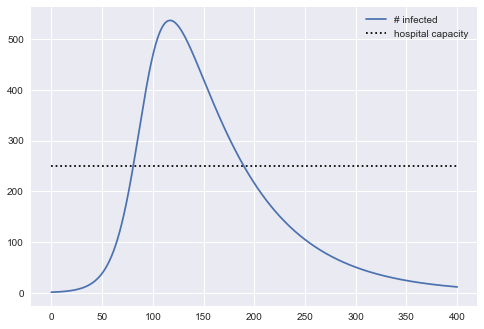

In [78]:
# Mess around with beta and see the curve flatten.
plotter(999, 1, 250, beta=0.09)